<a href="https://colab.research.google.com/github/devinv-MSS/minnano_ai/blob/kamawae-udemy/section_6/digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 手書き文字の認識
scikit-learnを使って手書き文字の認識を行います。  
今回は、0-9までの手書き数字データを使ってサポートベクターマシンを訓練し、未知の手書き文字画像の分類を行います。  

In [1]:
!pip install icecream

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from icecream import ic

## ● 手書き数字データ
手書き文字のデータセットですが、今回もscikit-learnのdatasetsから入手します。  
このデータセットには、0から9までの手書き数字の画像が多数含まれています。  
また、それらの画像がどの数値を表しているのか示すラベルも一緒になっています。  
以下は、scikit-learnのdatasetsから手書き文字のデータセットを取得し、画像データの形状及び最初の画像を表示するコードです。  
画像のサイズは8x8ピクセルで、1797枚あります。  

ic| '--- 画像データ ---'
ic| digits.images[0]: array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
                             [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
                             [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
                             [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
                             [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
                             [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
                             [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
                             [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])
ic| digits.images.shape: (1797, 8, 8)
ic| '--- 1次元画像データ ---'
ic| digits.data[0]: array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
                           15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
                           12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
                            0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0

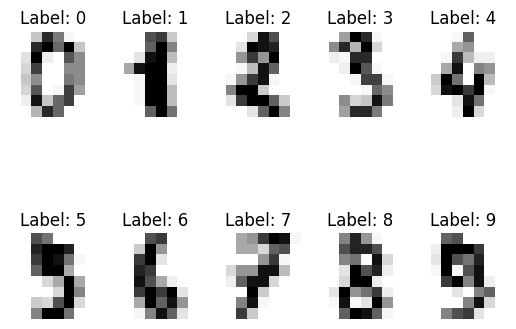

In [3]:
from sklearn import datasets
from sklearn import svm
import matplotlib.pyplot as plt

# 数字画像データの読み込み
digits = datasets.load_digits()

ic("--- 画像データ ---")
ic(digits.images[0])
ic(digits.images.shape)
ic("--- 1次元画像データ ---")
ic(digits.data[0])
ic(digits.data.shape)
ic("--- ラベル ---")
ic(digits.target)
ic(digits.target.shape)

# 画像と正解値の表示
images = digits.images
labels = digits.target
for i in range(10):
    plt.subplot(2, 5, i + 1)  # 2行5列、i+1の位置
    plt.imshow(images[i], cmap="Greys")
    plt.axis("off")
    plt.title("Label: " +  str(labels[i]))
plt.show()

In [ ]:
# コード練習用


## ● 手書き数字の分類
手書き数字のデータを使ってサポートベクターマシンを訓練し、未知の手書き文字を分類します。  
データ全体を`train_test_split`を使って訓練データとテストデータに分割します。  
そして、訓練用データを使ってサポートベクターマシンを訓練し、テストデータはこの性能を測るための未知のデータとします。  



ic| metrics.classification_report(t_test, y_test): ('              precision    recall  f1-score   support
                                                   '
                                                    '
                                                   '
                                                    '           0       1.00      1.00      1.00        44
                                                   '
                                                    '           1       0.96      1.00      0.98        51
                                                   '
                                                    '           2       1.00      1.00      1.00        40
                                                   '
                                                    '           3       1.00      0.98      0.99        41
                                                   '
                                                    '           4       1.00      0.98      0

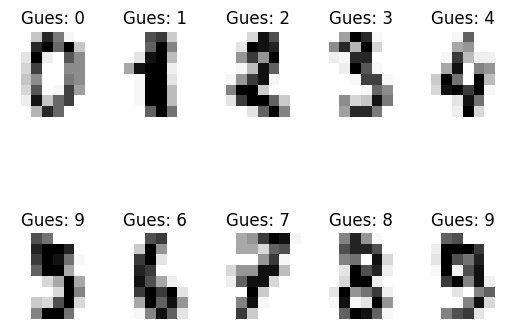

In [4]:
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

# 訓練データとテストデータに分割
digits = datasets.load_digits()
x_train, x_test, t_train, t_test = train_test_split(digits.data, digits.target)  # 25％がテストデータ

clf = svm.SVC()  # サポートベクターマシーン
clf.fit(x_train, t_train)  # 訓練

y_test = clf.predict(x_test)  # テストデータで予測
ic(metrics.classification_report(t_test, y_test))  # 正解率など
ic(metrics.confusion_matrix(t_test, y_test))  # 行:正解、列:予測

# 予測結果と画像の対応
images = digits.images[:10]  # 最初の10枚
y_10 = clf.predict(digits.data[:10])
for i in range(10):
    plt.subplot(2, 5, i + 1)  # 2行5列、i+1の位置
    plt.imshow(images[i], cmap="Greys")
    plt.axis("off")
    plt.title("Gues: " +  str(y_10[i]))
plt.show()

In [ ]:
# コード練習用
